Polynomial regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy.stats import ttest_ind

In [5]:
df = pd.read_excel('Housing_data.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.columns = ['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var', 'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs', 'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average', 'Perc Status Popul', 'Median Value Homes']
df.columns

Index(['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var',
       'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs',
       'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average',
       'Perc Status Popul', 'Median Value Homes'],
      dtype='object')

In [10]:
df

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Index Highways Distance,Tax rate,School Ratio,Blacks Average,Perc Status Popul,Median Value Homes
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


Polynomial regression

In [14]:
df

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Index Highways Distance,Tax rate,School Ratio,Blacks Average,Perc Status Popul,Median Value Homes
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


In [28]:


data1 = df[['Crime Rate', 'School Ratio']]
data1

,Crime Rate,School Ratio
0,632,1530
1,2731,1780
2,2729,1780
3,3237,1870
4,6905,1870
...,...,...
501,6263,2100
502,4527,2100
503,6076,2100
504,10959,2100


In [41]:
X = df['Crime Rate']
Y = df['School Ratio']
print(X)
print(Y)

0        632
1       2731
2       2729
3       3237
4       6905
       ...  
501     6263
502     4527
503     6076
504    10959
505     4741
Name: Crime Rate, Length: 506, dtype: int64
0      1530
1      1780
2      1780
3      1870
4      1870
       ... 
501    2100
502    2100
503    2100
504    2100
505    2100
Name: School Ratio, Length: 506, dtype: int64


R-Squared Value

In [42]:
import numpy
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))

print(r2_score(Y, mymodel(X)))

0.16052629156429932


El resultado 0.16 muestra una relación evidente entre ambas variables, por lo tanto podremos utilizar polynomial regression con el fin de predecir valores futuros

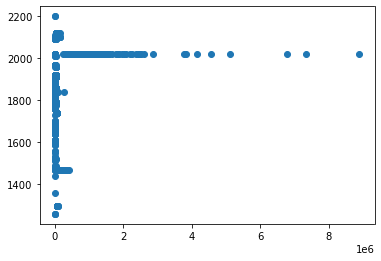

In [51]:
mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))
plt.scatter(X, Y)
myline = numpy.linspace(4, 10, 10)
plt.plot(myline, mymodel(myline))
plt.show()